## Libraries

In [1]:
import random
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
import json
import albumentations as A
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn
from tqdm import tqdm_notebook
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10

## Open Image

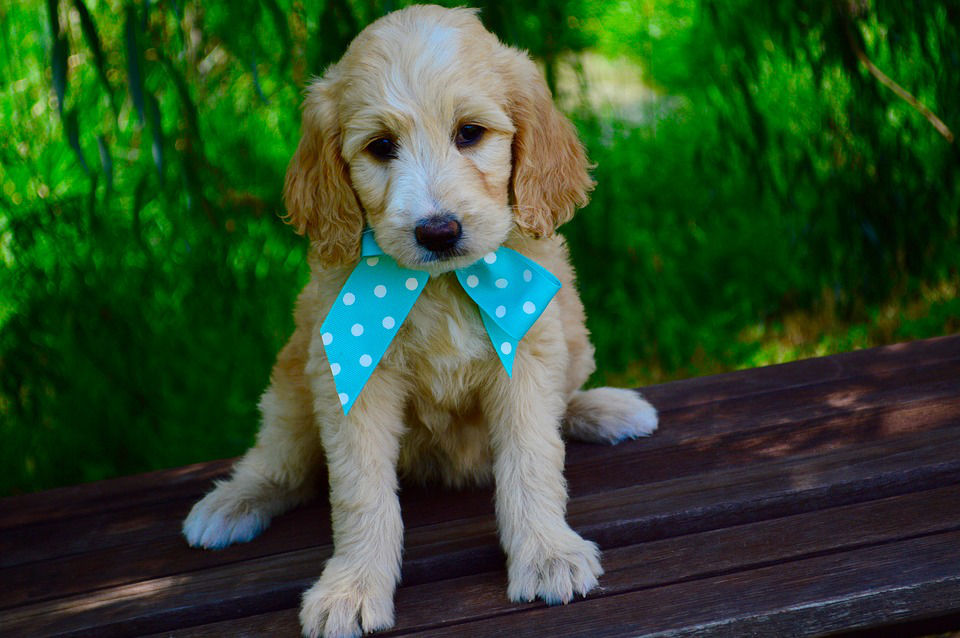

In [2]:
img = Image.open("/Users/Banner/Downloads/goldendoodle-1234760_960_720.jpeg")
img

## Resize

In [3]:
img_resized = Image.Image.resize(img, size=(224, 224))

In [4]:
img_resized.save("img_resized.jpg")

In [5]:
mean = np.mean(img_resized, axis=(1,2), keepdims=True)
std = np.std(img_resized, axis=(1,2), keepdims=True)
img_std = (img_resized - mean) / std

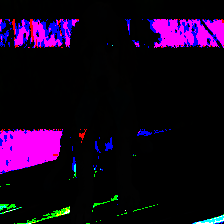

In [6]:
Image.fromarray(img_std.astype(np.uint8))

In [7]:
transform = A.Compose([
    A.RandomCrop(width=450, height=450),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='coco'))

In [8]:
Image.fromarray(A.RandomCrop(width=225, height=225)(image=np.array(img))['image']).save("img_crop.jpg")
Image.fromarray(A.ColorJitter()(image=np.array(img_resized))['image']).save("img_jitter.jpg")

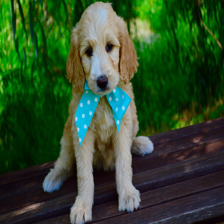

In [9]:
img_resized

In [10]:
Image.fromarray(A.Flip(0.8)(image=np.array(img_resized))['image']).save("img_flip.jpg")

In [11]:
Image.fromarray(A.GaussianBlur(p=0.8)(image=np.array(img_resized))['image']).save("img_gauss_blur.jpg")

In [12]:
Image.fromarray(A.RandomBrightness(p=0.9)(image=np.array(img_resized))['image']).save("img_bright.jpg")

/Users/Banner/anaconda3/envs/py39/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:1744: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


## Bounding Box Augmentation

In [13]:
BOX_COLOR = (0, 255, 0)
TEXT_COLOR = (255, 255, 255) # White

In [14]:
path = "/Users/Banner/Downloads/Chess Pieces.v24-416x416_aug.coco/train/"

In [15]:
with open("/Users/Banner/Downloads/Chess Pieces.v24-416x416_aug.coco/train/_annotations.coco.json") as f:
    json_file = json.load(f)

In [16]:
json_file['images'][0]['file_name']

'IMG_0317_JPG.rf.00207d2fe8c0a0f20715333d49d22b4f.jpg'

In [17]:
x_min, y_min, w, h = json_file['annotations'][0]['bbox']

In [18]:
x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

In [19]:
x_min, x_max, y_min, y_max

(220, 238, 14, 60)

In [20]:
with open("/Users/Banner/Downloads/Chess Pieces.v24-416x416_aug.coco/train/_annotations.coco.json") as f:
    json_file = json.load(f)
    
x_min, y_min, w, h = json_file['annotations'][0]['bbox']
x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

def visualize_bbox(img, bbox, class_name, color=(0, 255, 0), thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=(255, 255, 255), 
        lineType=cv2.LINE_AA,
    )
    return img

In [21]:
img = Image.open("{}{}".format(path, json_file['images'][0]['file_name']))

In [22]:
bbox_img = visualize_bbox(np.array(img), json_file['annotations'][0]['bbox'], 
              class_name=json_file['categories'][0]['name'])

In [23]:
json_file['categories'][0]['name']

'pieces'

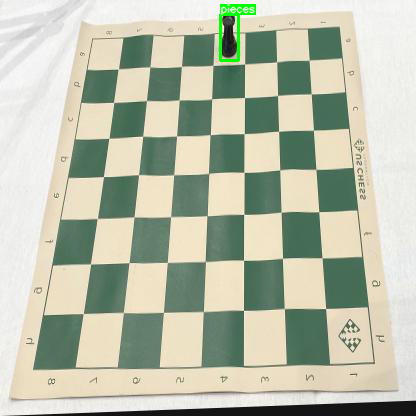

In [24]:
Image.fromarray(bbox_img)

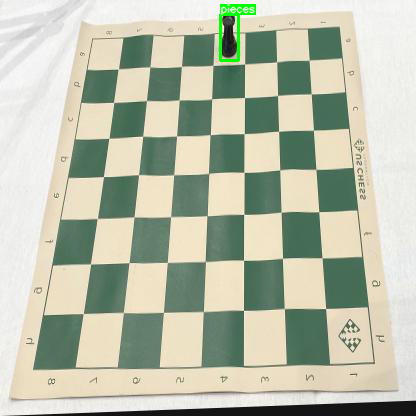

In [25]:
with open("{}_annotations.coco.json".format(path, )) as f:
    json_file = json.load(f)
    
x_min, y_min, w, h = json_file['annotations'][0]['bbox']
x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img
  
bbox_img = visualize_bbox(np.array(img), 
                          json_file['annotations'][0]['bbox'], 
                          class_name=json_file['categories'][0]['name'])

Image.fromarray(bbox_img)

In [26]:
Image.fromarray(bbox_img).save("img_0.jpg")

In [27]:
new_anno_dict = {}
new_cat_dict = {}
image_list = json_file.get('images')
anno_list = json_file.get('annotations')

In [28]:
for item in json_file.get('categories'):
    new_cat_dict[item['id']] = item['name']

In [29]:
for item in anno_list:
    img_id = item.get('image_id')
    if img_id not in new_anno_dict:
        temp_list = []
        temp_list.append(item)
        new_anno_dict[img_id] = temp_list
    else:
        new_anno_dict.get(img_id).append(item)

In [30]:
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

In [31]:
def visualize(image, bboxes, category_ids, category_id_to_name, i):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)
    plt.savefig(f"img_od_{i}.jpg")

In [32]:
class ImageDataset:
    def __init__(self, path, img_list, anno_dict, cat_dict, albumentations=None):
        self.path = path
        self.img_list = img_list
        self.anno_dict = anno_dict
        self.cat_dict = cat_dict
        self.albumentations = albumentations
    
    def __len__(self):
        return len(self.img_list)
    
    def __getitem__(self, idx):
        bboxes = [item['bbox'] for item in self.anno_dict[int(idx)]]
        cat_ids = [item['category_id'] for item in self.anno_dict[int(idx)]]
        categories = [self.cat_dict[idx] for idx in cat_ids]
        image = self.img_list[idx]
        img = Image.open(f"{self.path}{image.get('file_name')}")
        img = img.convert("RGB")
        img = np.array(img)
        if self.albumentations is not None:
            augmented = self.albumentations(image=img, bboxes=bboxes, category_ids=cat_ids)
            img = augmented["image"]
        return {
            "image": img,
            "bboxes": augmented["bboxes"],
            "category_ids": augmented["category_ids"],
            "category": categories
        }

In [33]:
dataset = ImageDataset(path, image_list, new_anno_dict, new_cat_dict, transform)

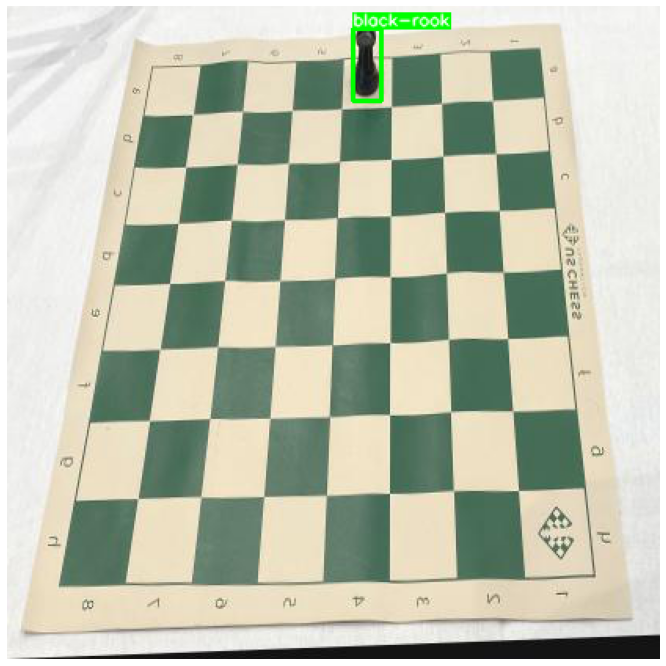

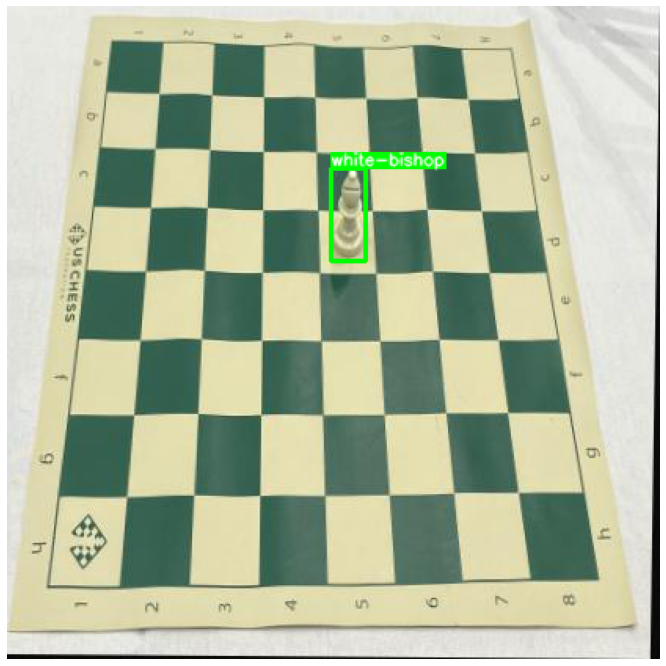

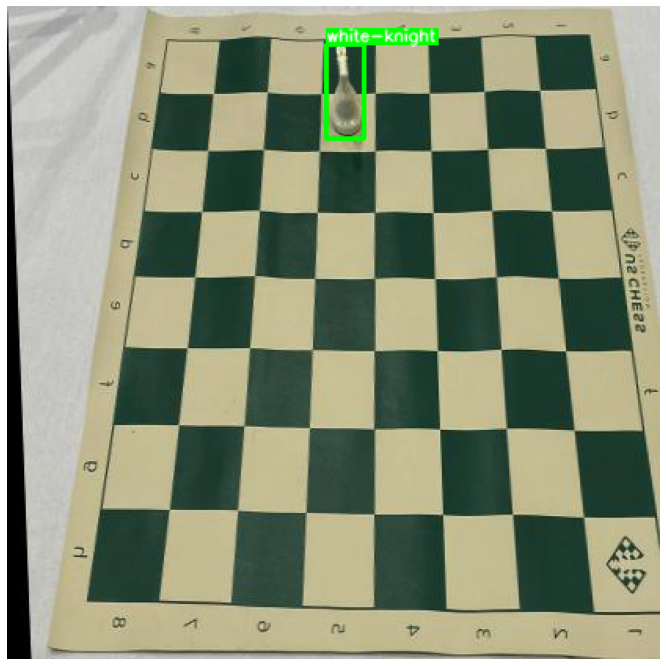

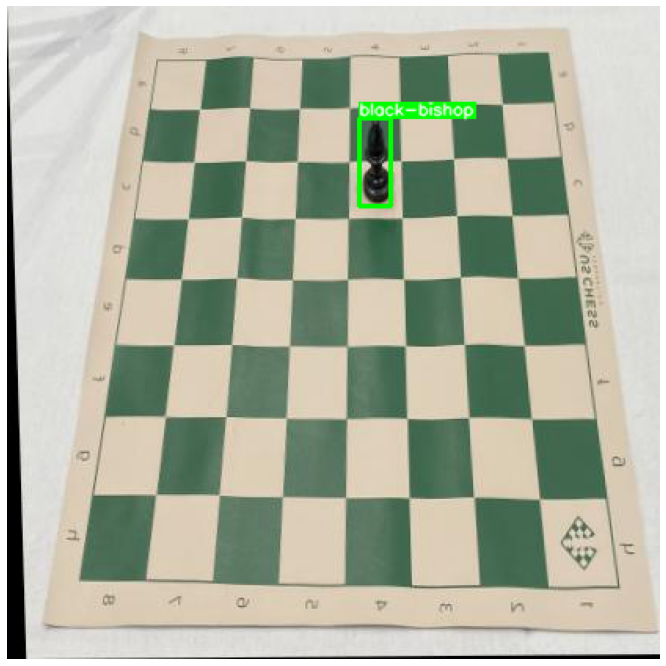

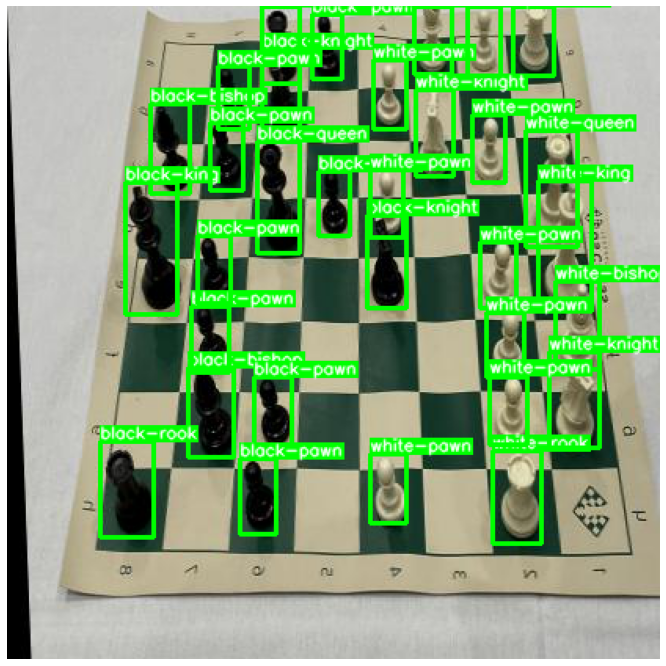

In [34]:
c = 0
for i, examples in enumerate(dataset):
    c+=1
    visualize(examples["image"], examples["bboxes"], examples["category_ids"], new_cat_dict, i)
    if c > 4:
        break

## Feature Extractor

In [35]:
resnet34 = models.resnet34()

In [36]:
class ResnetFeatureExtractor(nn.Module):
    def __init__(self, model):
        super(ResnetFeatureExtractor, self).__init__()
        self.model = nn.Sequential(*model.children())[:-1]
    def forward(self, x):
        return self.model(x)

In [37]:
feature_extractor = ResnetFeatureExtractor(resnet34)
feature_extractor

ResnetFeatureExtractor(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [38]:
cifar_dataset = CIFAR10("./", transform=transforms.ToTensor(), download=True)
cifar_dataloader = DataLoader(cifar_dataset, batch_size=1, shuffle=True)

Files already downloaded and verified


In [39]:
feature_extractor.eval()
feature_list = []
# data = next(iter(cifar_dataloader))
# inputs, labels = data
# extracted_features = feature_extractor(inputs)
for i, data in enumerate(tqdm_notebook(cifar_dataloader)):
    inputs, labels = data
    with torch.no_grad():
        extracted_features = feature_extractor(inputs)
    extracted_features = torch.flatten(extracted_features)
    feature_list.append(extracted_features)

<ipython-input-39-baf52c6bdc78>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, data in enumerate(tqdm_notebook(cifar_dataloader)):


  0%|          | 0/50000 [00:00<?, ?it/s]

/Users/Banner/anaconda3/envs/py39/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


KeyboardInterrupt: 

In [ ]:
feature_extractor